<a href="https://colab.research.google.com/github/CameliaRegista03/Sistem-Rekomendasi-Pariwisata/blob/main/Sistem_Rekomendasi_Pariwisata_Yogyakarta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT PACKAGES**

In [ ]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **DATA COLLECTING**

In [ ]:
#Load Data 

#Load Data Tempat Wisata
wisata = pd.read_csv('tourism_with_id.csv')

#Load Data User
profile = pd.read_csv('user.csv')

#Load Data Rating 
rating = pd.read_csv('tourism_rating.csv')

#Informasi pada file tempat wisata
print('Jumlah Kategori tempat wisata : ', len(wisata.Category.unique()))
print('Jumlah Kota tempat wisata : ', len(wisata.City.unique()))
print('Jumlah Tempat wisata : ', len(wisata.Place_Name.unique()))
print('Jumlah Range rating tempat wisata : ', len(wisata.Rating.unique()))

#Informasi pada  file user
print('Jumlah kota asal pengunjung : ', len(profile.Location.unique()))
print('Ada berapa banyak data usia : ', len(profile.Age.unique()))

#Informasi pada data rating
print('Jumlah data penilaian yang diberikan pengguna : ', len(rating.User_Id.unique()))
print('Jumlah data penilaian tempat wisata : ', len(rating.Place_Id.unique()))

Jumlah Kategori tempat wisata :  6
Jumlah Kota tempat wisata :  5
Jumlah Tempat wisata :  437
Jumlah Range rating tempat wisata :  14
Jumlah kota asal pengunjung :  28
Ada berapa banyak data usia :  23
Jumlah data penilaian yang diberikan pengguna :  300
Jumlah data penilaian tempat wisata :  437


# **DATA UNDERSTANDING**

Univariate Analysis

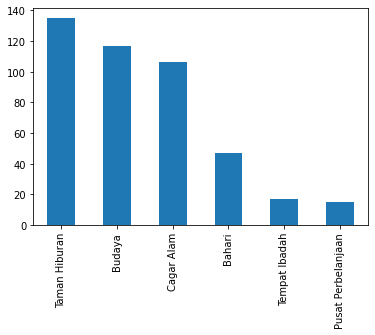

In [ ]:
#Tampilkan kategori tempat wisata ada apa saja 
wisata['Category'].value_counts().plot(kind='bar')

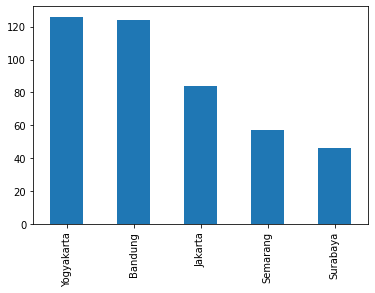

In [ ]:
#Tampilkan kota tempat wisata ada kota apa saja 
wisata['City'].value_counts().plot(kind='bar')

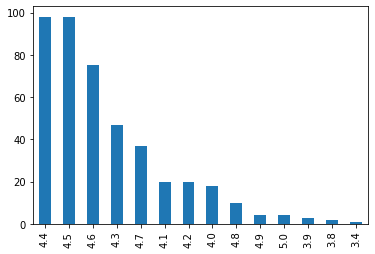

In [ ]:
#Tampilkan range rating terhadap tempat wisata
wisata['Rating'].value_counts().plot(kind='bar')

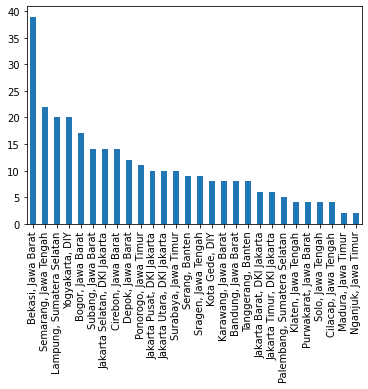

In [ ]:
#Tampilkan lokasi asa pengunjung 
profile['Location'].value_counts().plot(kind='bar')

In [ ]:
#Tampilkan info dataset wisata
wisata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [ ]:
#Tampilkan informasi data pada dataset rating
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [ ]:
#Tampilkan informasi data pada dataset profile
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


# **DATA PREPROCESSING**

In [ ]:
#Melihat data
wisata.head(2)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2


In [ ]:
#Mengambil data tempat wisata yang berasal dari kota Yogyakarta saja
wisata = wisata[wisata['City']=='Yogyakarta']

#Tampilkan data
#wisata.head()

In [ ]:
#Cek dimensi data sebelum handling missing value
wisata.shape

(126, 13)

In [ ]:
#Cek missing value
wisata.isnull().sum()

Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes     66
Coordinate        0
Lat               0
Long              0
Unnamed: 11     126
Unnamed: 12       0
dtype: int64

In [ ]:
#Handling mising value dengan drop 
wisata = wisata.drop(['Unnamed: 11', 'Unnamed: 12', 'Time_Minutes'], axis=1)

#Cek missing value 
wisata.isnull().sum()

Place_Id       0
Place_Name     0
Description    0
Category       0
City           0
Price          0
Rating         0
Coordinate     0
Lat            0
Long           0
dtype: int64

In [ ]:
#Tampilkan data wisata setelah handling missing value
wisata.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Coordinate,Lat,Long
84,85,Taman Pintar Yogyakarta,Taman Pintar Yogyakarta (bahasa Jawa: Hanacara...,Taman Hiburan,Yogyakarta,6000,4.5,"{'lat': -7.800671500000001, 'lng': 110.3676551}",-7.800671,110.367655
85,86,Keraton Yogyakarta,Keraton Ngayogyakarta Hadiningrat atau Keraton...,Budaya,Yogyakarta,15000,4.6,"{'lat': -7.8052845, 'lng': 110.3642031}",-7.805284,110.364203
86,87,Sindu Kusuma Edupark (SKE),Sindu Kusuma Edupark (SKE) merupakan sebuah de...,Taman Hiburan,Yogyakarta,20000,4.2,"{'lat': -7.767297300000001, 'lng': 110.3542486}",-7.767297,110.354249
87,88,Museum Benteng Vredeburg Yogyakarta,Museum Benteng Vredeburg (bahasa Jawa: ꦩꦸꦱꦶꦪꦸꦩ...,Budaya,Yogyakarta,3000,4.6,"{'lat': -7.800201599999999, 'lng': 110.3663044}",-7.800202,110.366304
88,89,De Mata Museum Jogja,Museum De Mata merupakan salah satu museum yan...,Budaya,Yogyakarta,50000,4.4,"{'lat': -7.816315599999999, 'lng': 110.3871442}",-7.816316,110.387144


In [ ]:
#Melihat dimensi data wisata
wisata.shape

(126, 10)

In [ ]:
#Tampilkan data rating
rating.head()

#Mengambil data rating untuk tempat wisata di Yogyakarta 
rating = pd.merge(rating, wisata[['Place_Id']], how='right', on='Place_Id')
rating.head()

,User_Id,Place_Id,Place_Ratings
0,2,85,4
1,23,85,4
2,25,85,2
3,39,85,5
4,43,85,4


In [ ]:
#Melihat  dimensi data rating kota Yogya
rating.shape

(2871, 3)

In [ ]:
#Melihat data pengunjung
profile.head()

#Mengambil data pengunjung yang hanya pernah engunjungi tempat wisata di Yogya
profile = pd.merge(profile, rating[['User_Id']], how='right', on='User_Id').drop_duplicates().sort_values('User_Id')
profile.head()

,User_Id,Location,Age
868,1,"Semarang, Jawa Tengah",20
0,2,"Bekasi, Jawa Barat",21
247,3,"Cirebon, Jawa Barat",23
621,4,"Bekasi, Jawa Barat",21
2649,5,"Lampung, Sumatera Selatan",20


In [ ]:
#Melihat dimensi data user kota yogya
profile.shape

(300, 3)

# **DATA PREPARATION**

Multivariate Analysis Kota Yogyakarta

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


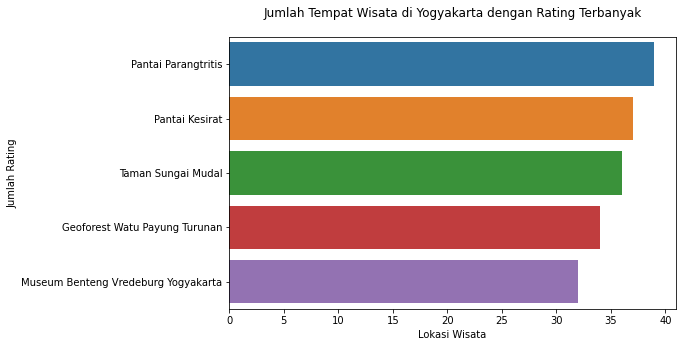

In [ ]:
#Membuat dataframe baru untuk mengelompokan tempat wisata di Yogyakarta berdasarkan rating
top_5 = rating['Place_Id'].value_counts().reset_index()[0:5]
top_5 = pd.merge(top_5, wisata[['Place_Id','Place_Name']], how='left', left_on='index', right_on='Place_Id')


# Membuat visualisasi tempat wisata Yogyakarta diurutkan berdasarkan jumlah rating terbanyak
plt.figure(figsize=(8,5))
sns.barplot('Place_Id_x', 'Place_Name', data=top_5)
plt.title('Jumlah Tempat Wisata di Yogyakarta dengan Rating Terbanyak', pad=20)
plt.ylabel('Jumlah Rating')
plt.xlabel('Lokasi Wisata')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


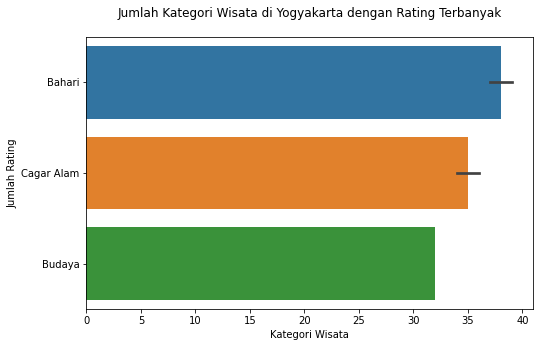

In [ ]:
#Membuat dataframe baru untuk mengelompokan ketgori tempat wisata di Yogyakarta berdasarkan rating
top_5 = rating['Place_Id'].value_counts().reset_index()[0:5]
top_5 = pd.merge(top_5, wisata[['Place_Id','Category']], how='left', left_on='index', right_on='Place_Id')


# Membuat visualisasi tempat wisata Yogyakarta diurutkan berdasarkan jumlah rating terbanyak
plt.figure(figsize=(8,5))
sns.barplot('Place_Id_x', 'Category', data=top_5)
plt.title('Jumlah Kategori Wisata di Yogyakarta dengan Rating Terbanyak', pad=20)
plt.ylabel('Jumlah Rating')
plt.xlabel('Kategori Wisata')
plt.show()

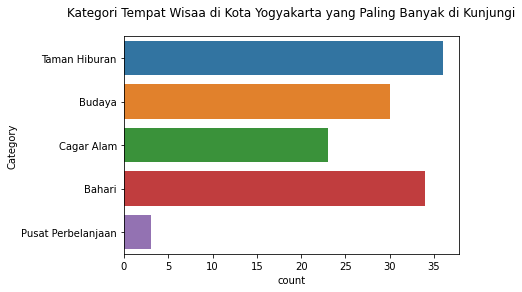

In [ ]:
#Mmebuat visualisasi untuk mengetahui kategori tempat wisata di Yogyakarta yang paling banyak di kunjungi
sns.countplot(y='Category', data=wisata)
plt.title('Kategori Tempat Wisaa di Kota Yogyakarta yang Paling Banyak di Kunjungi', pad=20)
plt.show()

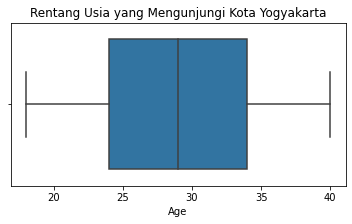

In [ ]:
#Melihat distribusi range usia yang mengunjungungi tempat wisata di kota Yogyakarta

plt.figure(figsize=(6,3))
sns.boxplot(x=profile['Age']);
plt.title('Rentang Usia yang Mengunjungi Kota Yogyakarta')
plt.show()

In [ ]:
#Melihat lebih dalam lagi ada apa dalam fitur Age
profile[['Age']].value_counts().sort_index(ascending=True)

Age
18     15
19     12
20     16
21     13
22      7
23     11
24     13
25     15
26      9
27     17
28     16
29     17
30     21
31     14
32     14
33     12
34     14
35      9
36      6
37     13
38     16
39     13
40      7
dtype: int64

Text(0.5, 1.0, 'Distribusi rentang harga tiket masuk tempat wisata Kota Yogyakarta')

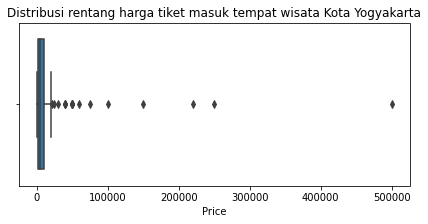

In [ ]:
#Membuat visualisasi distribusi harga masuk ke tempat wisata di Kota Yogyakarta dengan data yang masih mengandung outliers
plt.figure(figsize=(7,3))
sns.boxplot(x=wisata['Price'])
plt.title('Distribusi rentang harga tiket masuk tempat wisata Kota Yogyakarta')

In [ ]:
#Mengecek deskriptif data sebelum handling outliers, Fokus pada kolom price 
wisata.describe() #Lihat pada kolom price, nilai max nya jatuh pada Rp500.000

,Place_Id,Price,Rating,Lat,Long
count,126.000000,126.000000,126.000000,126.000000,126.000000
mean,147.500000,19456.349206,4.466667,-7.890662,110.423022
std,36.517119,55219.055401,0.173897,0.166461,0.140273
min,85.000000,0.000000,4.000000,-8.197894,110.019826
25%,116.250000,2500.000000,4.400000,-8.011420,110.363687
50%,147.500000,5000.000000,4.500000,-7.816139,110.416944
75%,178.750000,10000.000000,4.600000,-7.793766,110.492845
max,210.000000,500000.000000,5.000000,-7.582920,110.720853


In [ ]:
#Cek Ukura  dataset sebelum handling outliers 
wisata.shape

(126, 10)

In [ ]:
#Handling Outliers 
Q1 = wisata.quantile(0.25)
Q3 = wisata.quantile(0.75)
IQR=Q3-Q1
wisata=wisata[~((wisata<(Q1-1.5*IQR))|(wisata>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
wisata.shape


(87, 10)

Text(0.5, 1.0, 'Distribusi rentang harga tiket masuk tempat wisata Kota Yogyakarta')

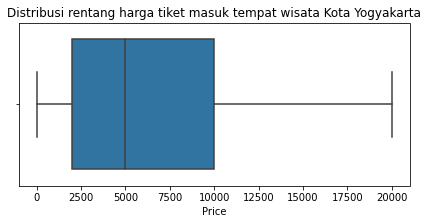

In [ ]:
#Visualisasi distribusi harga masuk ke tempat wisata di Yogyakarta dengan data yang sudah tidak mengandung outliers
plt.figure(figsize=(7,3))
sns.boxplot(x=wisata['Price'])
plt.title('Distribusi rentang harga tiket masuk tempat wisata Kota Yogyakarta')

In [ ]:
#Melihat informasi statistik pada data wisata setelah handling outliers
wisata.describe() #Lihatlah nilai max dari kolom price hanya jatuh pada Rp200.000

,Place_Id,Price,Rating,Lat,Long
count,87.000000,87.000000,87.000000,87.000000,87.000000
mean,143.517241,5936.781609,4.482759,-7.902842,110.439876
std,35.599145,5259.434821,0.124084,0.165280,0.105313
min,85.000000,0.000000,4.200000,-8.182703,110.236730
25%,112.000000,2000.000000,4.400000,-8.025732,110.364318
50%,142.000000,5000.000000,4.500000,-7.836321,110.424333
75%,171.500000,10000.000000,4.600000,-7.800127,110.503731
max,209.000000,20000.000000,4.800000,-7.582920,110.683239


In [ ]:
#Mendeteksi Outlier
wisata.shape

(87, 10)

In [ ]:
wisata.describe(include = 'object')

,Place_Name,Description,Category,City,Coordinate
count,87,87,87,87,87
unique,87,87,5,1,87
top,Museum Gunung Merapi,Pantai Indrayanti menawarkan keindahan alam ya...,Taman Hiburan,Yogyakarta,"{'lat': -7.782943699999998, 'lng': 110.3670548}"
freq,1,1,28,87,1


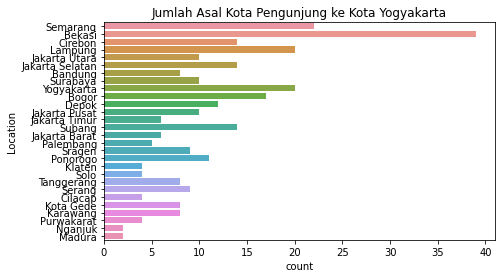

In [ ]:
from IPython.core.pylabtools import figsize
#Filtering asal kota pengunjung ke kota Yogyakarta
asal = profile['Location'].apply(lambda x : x.split(',')[0])

#Visualisasi
plt.figure(figsize=(7,4))
sns.countplot(y=asal)
plt.title('Jumlah Asal Kota Pengunjung ke Kota Yogyakarta')
plt.show()

Persiapan Data Untuk Modelling

In [ ]:
#Menyalin dataframe rating
df = rating.copy()
df.head()

,User_Id,Place_Id,Place_Ratings
0,2,85,4
1,23,85,4
2,25,85,2
3,39,85,5
4,43,85,4


Melakukan encoding

In [ ]:
def dict_encoder(col, data=df):

  # Mengubah kolom suatu dataframe menjadi list tanpa nilai yang sama
  unique_val = data[col].unique().tolist()

  # Melakukan encoding value kolom suatu dataframe ke angka
  val_to_val_encoded = {x: i for i, x in enumerate(unique_val)}

  # Melakukan proses encoding angka ke value dari kolom suatu dataframe
  val_encoded_to_val = {i: x for i, x in enumerate(unique_val)}
  return val_to_val_encoded, val_encoded_to_val

Encoding dan Mapping Kolom User

In [ ]:
# Encoding User_Id
user_to_user_encoded, user_encoded_to_user = dict_encoder('User_Id')

# Mapping User_Id ke dataframe
df['user'] = df['User_Id'].map(user_to_user_encoded)

Encoding dan Mapping Kolom Place

In [ ]:
# Encoding Place_Id
place_to_place_encoded, place_encoded_to_place = dict_encoder('Place_Id')

# Mapping Place_Id ke dataframe place
df['place'] = df['Place_Id'].map(place_to_place_encoded)

In [ ]:
#Tahap pengecekan kondisi data kita 

# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)
 
# Mendapatkan jumlah tempat wisata
num_place = len(place_to_place_encoded)
print(num_place)
 
# Mengubah rating menjadi nilai float
df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)
 
# Nilai minimum rating
min_rating = min(df['Place_Ratings'])
 
# Nilai maksimal rating
max_rating = max(df['Place_Ratings'])
 
print('Number of User: {}, Number of Place: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_place, min_rating, max_rating
))

300
126
Number of User: 300, Number of Place: 126, Min Rating: 1.0, Max Rating: 5.0


In [ ]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,User_Id,Place_Id,Place_Ratings,user,place
729,194,115,4.0,130,30
2067,276,176,2.0,23,91
1288,197,142,5.0,148,57
1738,247,162,3.0,20,77
2078,109,177,2.0,31,92
...,...,...,...,...,...
1638,124,158,3.0,188,73
1095,260,133,3.0,217,48
1130,22,135,3.0,224,50
1294,271,142,5.0,57,57


In [ ]:
# Membuat variabel x untuk mencocokkan data user dan tempat wisata menjadi satu value
x = df[['user', 'place']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = df['Place_Ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[130  30]
 [ 23  91]
 [148  57]
 ...
 [224  50]
 [ 57  57]
 [179  36]] [0.75 0.25 1.   ... 0.5  1.   0.  ]


# **MODELLING**

1. **Membangun Model Collaborative Filtering dengan deep learning**

Membagi Data Untuk Training dan Validasi

Proses Training

In [ ]:
#Import Library tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 

#Membuat class RecomenderNet
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_place, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_place = num_place
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.place_embedding = layers.Embedding( # layer embeddings tempat wisata
        num_place,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.place_bias = layers.Embedding(num_place, 1) # layer embedding tempat wisata bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    place_vector = self.place_embedding(inputs[:, 1]) # memanggil layer embedding 3
    place_bias = self.place_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_place = tf.tensordot(user_vector, place_vector, 2) 
 
    x = dot_user_place + user_bias + place_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

In [ ]:
#Proses Compile Terhadap Model
model = RecommenderNet(num_users, num_place, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.025),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.97):
      print("\nAkurasi telah mencapai >97%. Stop training!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
# Memulai training
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
287/287 [==============================] - 3s 6ms/step - loss: 1.2458 - root_mean_squared_error: 0.4622 - val_loss: 2.4419 - val_root_mean_squared_error: 0.5489
Epoch 2/100
287/287 [==============================] - 2s 8ms/step - loss: 4.8046 - root_mean_squared_error: 0.5764 - val_loss: 4.3004 - val_root_mean_squared_error: 0.5677
Epoch 3/100
287/287 [==============================] - 2s 8ms/step - loss: 7.4185 - root_mean_squared_error: 0.5787 - val_loss: 5.0211 - val_root_mean_squared_error: 0.5869
Epoch 4/100
287/287 [==============================] - 2s 7ms/step - loss: 8.0969 - root_mean_squared_error: 0.5795 - val_loss: 4.7947 - val_root_mean_squared_error: 0.5584
Epoch 5/100
287/287 [==============================] - 2s 8ms/step - loss: 8.6608 - root_mean_squared_error: 0.5799 - val_loss: 4.3819 - val_root_mean_squared_error: 0.5623
Epoch 6/100
287/287 [==============================] - 2s 7ms/step - loss: 7.8267 - root_mean_squared_error: 0.5799 - val_loss: 4.2053 

# **EVALUATION**

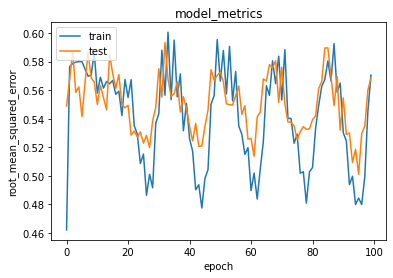

In [ ]:
#Visualisasi Metrik
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **UJI MODEL**

In [ ]:
# Menyiapkan dataframe
place_df = wisata[['Place_Id','Place_Name','Category','Rating','Price']]
place_df.columns = ['id','place_name','category','rating','price']
df = rating.copy()

In [ ]:
# Mengambil sample user
user_id = df.User_Id.sample(1).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]

In [ ]:
# Membuat data lokasi yang belum dikunjungi user
place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user.Place_Id.values)]['id'] 
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)
 
place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

In [ ]:
# Mengambil top 7 recommendation
ratings = model.predict(user_place_array).flatten()
top_ratings_indices = ratings.argsort()[-7:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]
 
print('Daftar rekomendasi untuk: {}'.format('User ' + str(user_id)))
print('===' * 15,'\n')
print('----' * 15)
print('Tempat dengan rating wisata paling tinggi dari user')
print('----' * 15)
 
top_place_user = (
    place_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)
 
place_df_rows = place_df[place_df['id'].isin(top_place_user)]
for row in place_df_rows.itertuples():
    print(row.place_name, ':', row.category)

print('')
print('----' * 15)
print('7 Tempat Rekomendasi')
print('----' * 15)

recommended_place = place_df[place_df['id'].isin(recommended_place_ids)]
for row, i in zip(recommended_place.itertuples(), range(1,8)):
    print(i,'.', row.place_name, '\n    ', row.category, ',', 'Harga Tiket Masuk ', row.price, ',', 'Rating Wisata ', row.rating,'\n')

print('==='*15)

Daftar rekomendasi untuk: User 189

------------------------------------------------------------
Tempat dengan rating wisata paling tinggi dari user
------------------------------------------------------------
Embung Tambakboyo : Taman Hiburan
Monumen Sanapati : Budaya
Pantai Ngobaran : Bahari
Pantai Siung : Bahari
Pantai Kesirat : Bahari

------------------------------------------------------------
7 Tempat Rekomendasi
------------------------------------------------------------
1 . Bunker Kaliadem Merapi 
     Cagar Alam , Harga Tiket Masuk  3000 , Rating Wisata  4.5 

2 . Bentara Budaya Yogyakarta (BBY) 
     Budaya , Harga Tiket Masuk  0 , Rating Wisata  4.5 

3 . Goa Rancang Kencono 
     Cagar Alam , Harga Tiket Masuk  5000 , Rating Wisata  4.3 

4 . Goa Cerme 
     Cagar Alam , Harga Tiket Masuk  3000 , Rating Wisata  4.4 

5 . Wisata Kraton Jogja 
     Budaya , Harga Tiket Masuk  7000 , Rating Wisata  4.7 

6 . Desa Wisata Kelor 
     Taman Hiburan , Harga Tiket Masuk  0 , Rati